# This notebook looks into the relationship between rides and weather data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
import numpy as np
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3

In [2]:
# Make database connections
#con1 = sqlite3.connect('data/citibike_database.db3')
con2 = sqlite3.connect('data/nyc_weather.db3')

# First i'll look at just one year (2014)

## Load rides data

In [3]:
# Number of rides each yday
year = 2014
#rides = pd.read_sql_query("SELECT yday,count(*) as num_rides FROM rides WHERE year=? GROUP BY yday",con1,params=[year])

rides = pd.read_csv('data/TotalRidesGroupedByDate.csv')
rides = rides.loc[rides.year==2014]
rides.head()


,year,month,day,wkday,yday,Nrides,date
184,2014,1,1,2,1,6059,2014-01-01
185,2014,1,2,3,2,8600,2014-01-02
186,2014,1,3,4,3,1144,2014-01-03
187,2014,1,4,5,4,2292,2014-01-04
188,2014,1,5,6,5,2678,2014-01-05


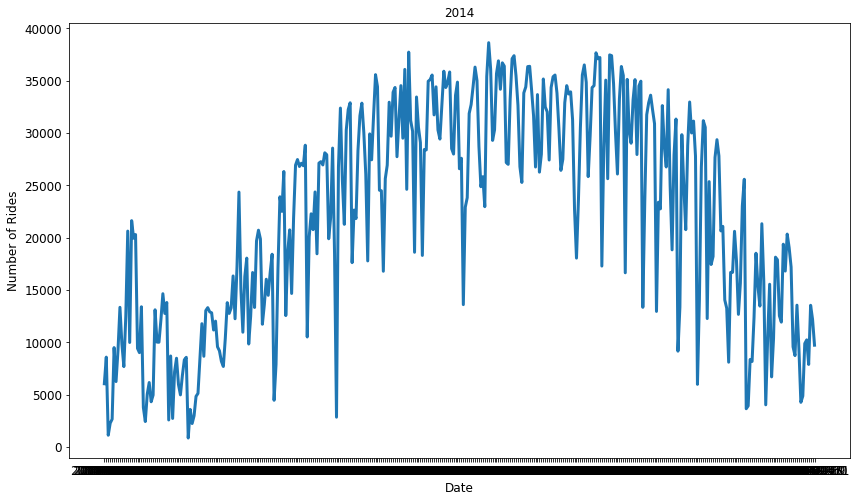

In [4]:
# Plot number of rides vs yday
plt.figure(figsize=(14,8))
plt.plot(rides.date, rides.Nrides)
#plt.grid();
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title(str(year));

## Load weather data

In [5]:
wea = pd.read_sql_query("SELECT * FROM temps WHERE year=?",con2,params=[year])
wea['date'] = pd.to_datetime(wea.date)
wea.loc[wea.precip_In=='T'] = 0
wea.loc[:,'precip_In'] = wea.astype({'precip_In':'float64'})
wea.set_index('date',inplace=True)
wea.head()


,st_code,max_temp,min_temp,mean_temp,year,yday,month,precip_In,cloud_cover,max_gust_mph,events
date,,,,,,,,,,,
2014-01-01 00:00:00,KLGA,33,25,29,2014,1,1,0.00,6,28,None
2014-01-02 00:00:00,KLGA,32,18,25,2014,2,1,0.18,8,36,Fog-Snow
2014-01-03 00:00:00,KLGA,19,10,15,2014,3,1,0.25,4,37,Fog-Snow
2014-01-04 00:00:00,KLGA,28,9,19,2014,4,1,0.00,2,21,None
2014-01-05 00:00:00,KLGA,50,25,38,2014,5,1,0.10,7,26,Fog-Rain


In [6]:
wea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2014-01-01 00:00:00 to 2014-12-31 00:00:00
Data columns (total 11 columns):
st_code         365 non-null object
max_temp        365 non-null int64
min_temp        365 non-null int64
mean_temp       365 non-null int64
year            365 non-null int64
yday            365 non-null int64
month           365 non-null int64
precip_In       365 non-null float64
cloud_cover     365 non-null int64
max_gust_mph    365 non-null int64
events          171 non-null object
dtypes: float64(1), int64(8), object(2)
memory usage: 34.2+ KB


Text(0.5,1,'2014')

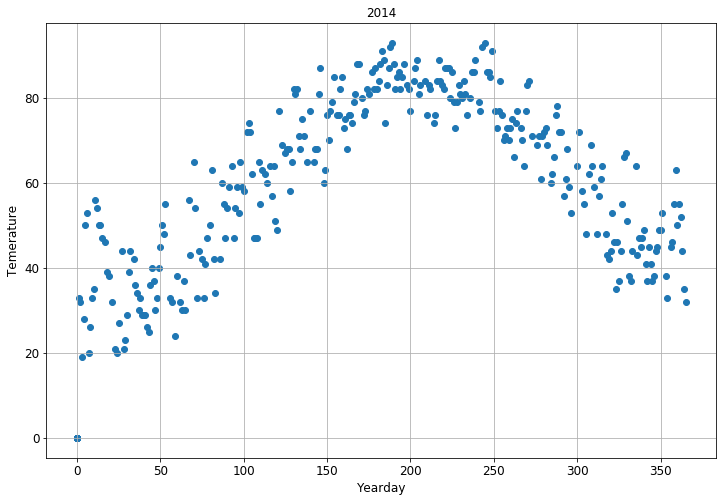

In [7]:
# plot timeseries of max temp for 2014
plt.figure(figsize=(12,8))
plt.scatter(wea.yday, wea.max_temp)
plt.grid();
plt.xlabel('Yearday')
plt.ylabel('Temerature');
plt.title(str(year))

## Now join weather data to rides so we can plot # rides vs temperature for each day

In [8]:
rides_wea_comb = pd.merge(rides,wea,on='yday')
rides_wea_comb.head()

,year_x,month_x,day,wkday,yday,Nrides,date,st_code,max_temp,min_temp,mean_temp,year_y,month_y,precip_In,cloud_cover,max_gust_mph,events
0,2014,1,1,2,1,6059,2014-01-01,KLGA,33,25,29,2014,1,0.00,6,28,None
1,2014,1,2,3,2,8600,2014-01-02,KLGA,32,18,25,2014,1,0.18,8,36,Fog-Snow
2,2014,1,3,4,3,1144,2014-01-03,KLGA,19,10,15,2014,1,0.25,4,37,Fog-Snow
3,2014,1,4,5,4,2292,2014-01-04,KLGA,28,9,19,2014,1,0.00,2,21,None
4,2014,1,5,6,5,2678,2014-01-05,KLGA,50,25,38,2014,1,0.10,7,26,Fog-Rain


Text(0,0.5,'# rides')

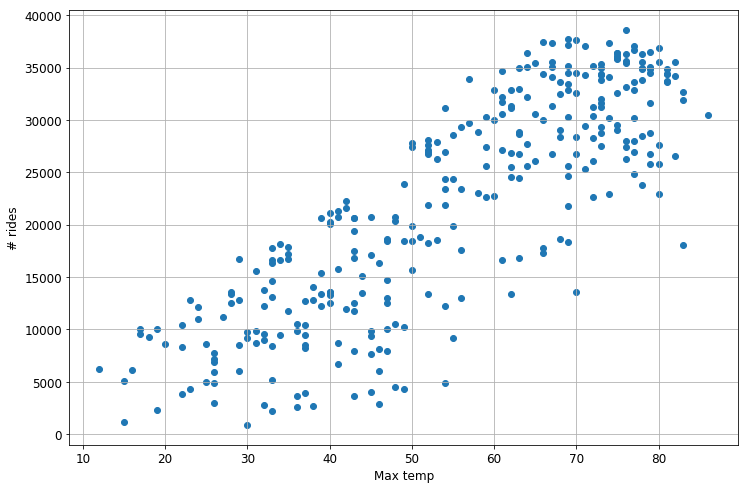

In [9]:
#plt.scatter(comb.Max_TemperatureF,comb.num_rides)
plt.figure(figsize=(12,8))
plt.scatter(rides_wea_comb.mean_temp,rides_wea_comb.Nrides)
plt.grid();
plt.xlabel('Max temp')
plt.ylabel('# rides')

/Users/Andy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


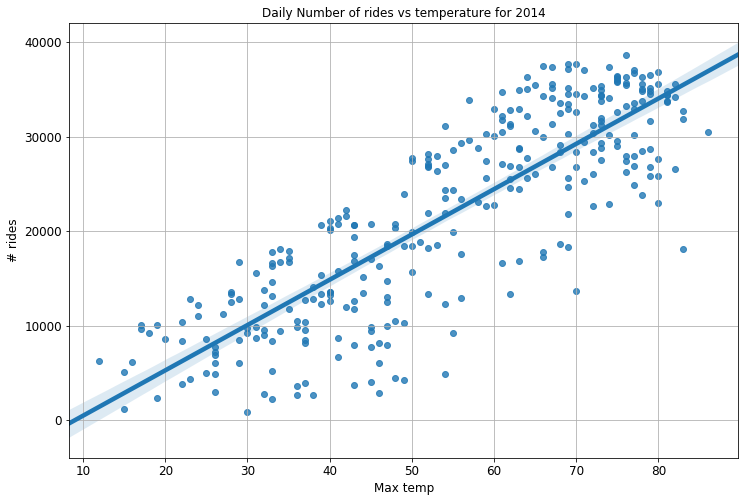

In [10]:
# Use seaborn to scatterplot w/ linear regression
plt.figure(figsize=(12,8))
sns.regplot(rides_wea_comb.mean_temp, rides_wea_comb.Nrides)
plt.grid();
plt.xlabel('Max temp')
plt.ylabel('# rides')
plt.title('Daily Number of rides vs temperature for ' + str(year)) ;
plt.savefig('figures/rides_vs_temp_2015.pdf')

## Fit a linear regression using statsmodels

In [11]:
# Fit a linear regression
import statsmodels.formula.api as smf
# create a fitted model in one line
lm = smf.ols(formula='Nrides~mean_temp', data = rides_wea_comb).fit()
# print the coefficients
lm.params

Intercept   -4336.942046
mean_temp     479.646240
dtype: float64

In [12]:
lm.rsquared

0.7043178483225534

## Plot the iftted regression line over the data

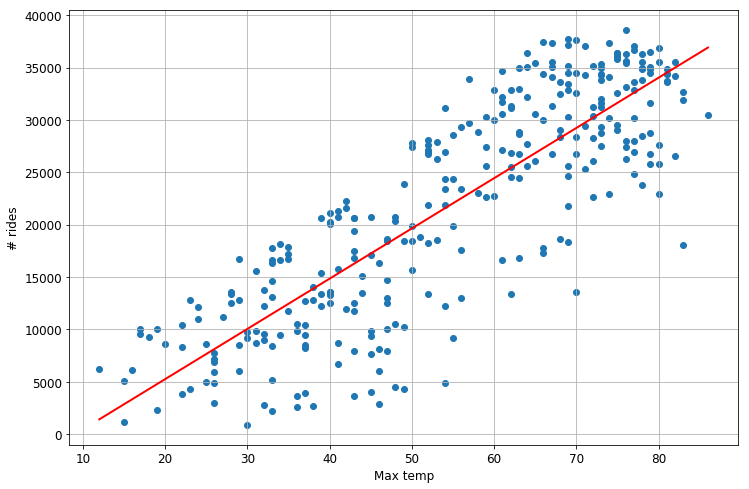

In [13]:
# plot the regression line over the data
X_new = pd.DataFrame({'mean_temp': [rides_wea_comb.mean_temp.min(), rides_wea_comb.mean_temp.max()]})
#X_new.head()
preds = lm.predict(X_new)

plt.figure(figsize=(12,8))
plt.scatter(rides_wea_comb.mean_temp,rides_wea_comb.Nrides)
plt.grid();
plt.xlabel('Max temp')
plt.ylabel('# rides')

plt.plot(X_new,preds,c='red',linewidth=2)

The R^2 value is 0.62, which means that 62% of the variance in num_rides can be explained by the mean temperature.

## Fit linear regression w/ sklearn

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X = rides_wea_comb.mean_temp.values.reshape(-1,1)
Y = rides_wea_comb.Nrides.values.reshape(-1,1)
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

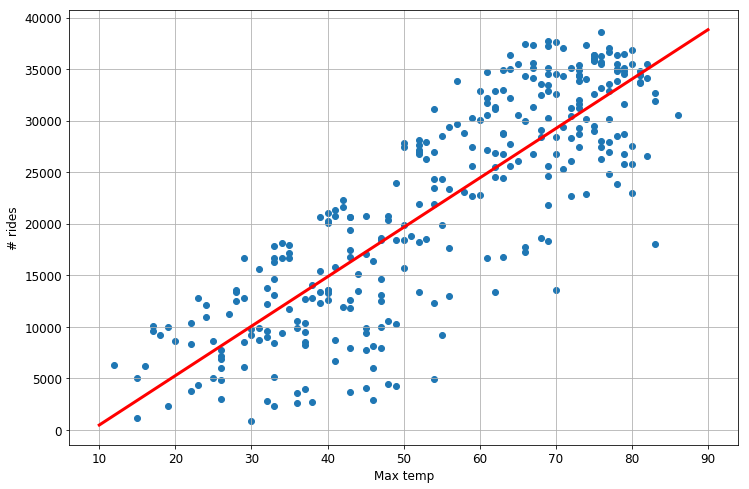

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(rides_wea_comb.mean_temp, rides_wea_comb.Nrides)
plt.grid()
plt.xlabel('Max temp')
plt.ylabel('# rides')

# plot fitted line over data
pred_X = np.array([10,90]).reshape(-1,1)
plt.plot(pred_X,reg.predict(pred_X),c='red');

In [16]:
reg.score(X,Y)

0.7043178483225536

### Precipitation
- N rides is negatively correlated w/ precipiation
- A lot of days w/ little or no precip

/Users/Andy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


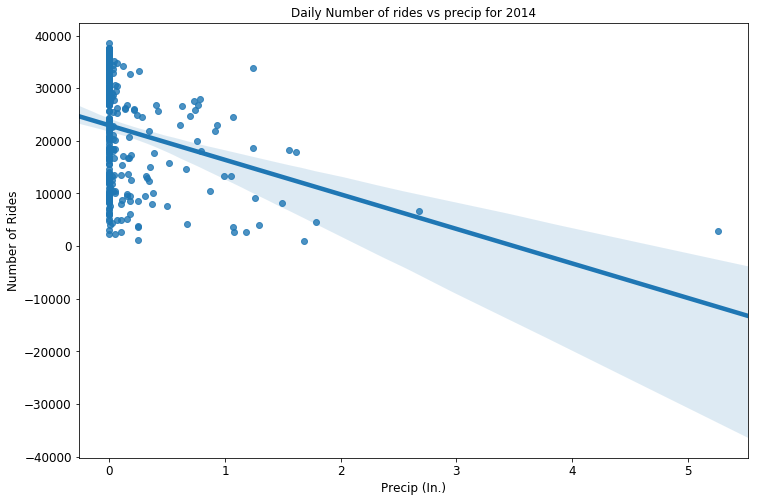

In [17]:
plt.figure(figsize=(12,8))
#plt.scatter(rides_wea_comb.precip_In, rides_wea_comb.Nrides)
sns.regplot(rides_wea_comb.precip_In, rides_wea_comb.Nrides)
plt.xlabel('Precip (In.)')
plt.ylabel('Number of Rides')
plt.title('Daily Number of rides vs precip for ' + str(year) );

### Maximum Wind Gust
- N rides is negatively correlated w/ wind

/Users/Andy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


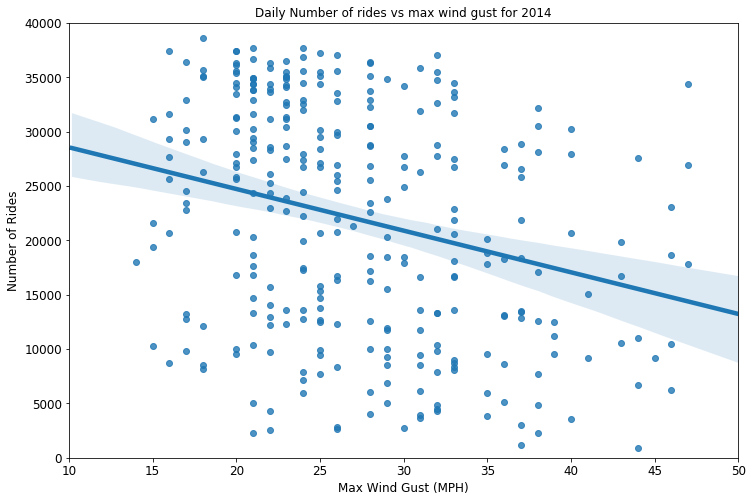

In [18]:
plt.figure(figsize=(12,8))
#plt.scatter(rides_wea_comb.max_gust_mph, rides_wea_comb.Nrides)
sns.regplot(rides_wea_comb.max_gust_mph, rides_wea_comb.Nrides)
#sns.jointplot(comb.max_gust_mph, comb.num_rides)
plt.xlabel('Max Wind Gust (MPH)')
plt.ylabel('Number of Rides')
plt.xlim(10,50)
plt.ylim(0,40000)
plt.title('Daily Number of rides vs max wind gust for ' + str(year) );

# Now use all data (instead of just 1 year)

In [19]:

rides=pd.read_csv('data/TotalRidesGroupedByDate.csv')
rides['date'] = pd.to_datetime(rides.date)
rides.head()
rides.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 7 columns):
year      1362 non-null int64
month     1362 non-null int64
day       1362 non-null int64
wkday     1362 non-null int64
yday      1362 non-null int64
Nrides    1362 non-null int64
date      1362 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(6)
memory usage: 74.6 KB


In [20]:
wea = pd.read_sql_query("SELECT * FROM temps ",con2)
wea.loc[wea.precip_In=='T'] = 0
wea.loc[:,'precip_In'] = wea.astype({'precip_In':'float64'})
wea['date'] = pd.to_datetime(wea.date)
#wea.set_index('date',inplace=True)
wea.head()
wea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 12 columns):
date            1659 non-null datetime64[ns]
st_code         1659 non-null object
max_temp        1659 non-null int64
min_temp        1659 non-null int64
mean_temp       1659 non-null int64
year            1659 non-null int64
yday            1659 non-null int64
month           1659 non-null int64
precip_In       1659 non-null float64
cloud_cover     1659 non-null int64
max_gust_mph    1655 non-null float64
events          767 non-null object
dtypes: datetime64[ns](1), float64(2), int64(7), object(2)
memory usage: 155.6+ KB


In [21]:
rides_wea_comb = pd.merge(rides,wea,on='date')
rides_wea_comb.head()

,year_x,month_x,day,wkday,yday_x,Nrides,date,st_code,max_temp,min_temp,mean_temp,year_y,yday_y,month_y,precip_In,cloud_cover,max_gust_mph,events
0,2013,7,1,0,182,16650,2013-07-01,KLGA,78,73,76,2013,182,7,0.73,8,26.0,Fog-Rain-Thunderstorm
1,2013,7,2,1,183,22745,2013-07-02,KLGA,83,73,78,2013,183,7,0.06,7,23.0,Rain-Thunderstorm
2,2013,7,3,2,184,21864,2013-07-03,KLGA,85,74,80,2013,184,7,0.96,7,23.0,Fog-Rain-Thunderstorm
3,2013,7,4,3,185,22326,2013-07-04,KLGA,91,76,84,2013,185,7,0.00,4,24.0,None
4,2013,7,5,4,186,21842,2013-07-05,KLGA,93,77,85,2013,186,7,0.00,1,23.0,None


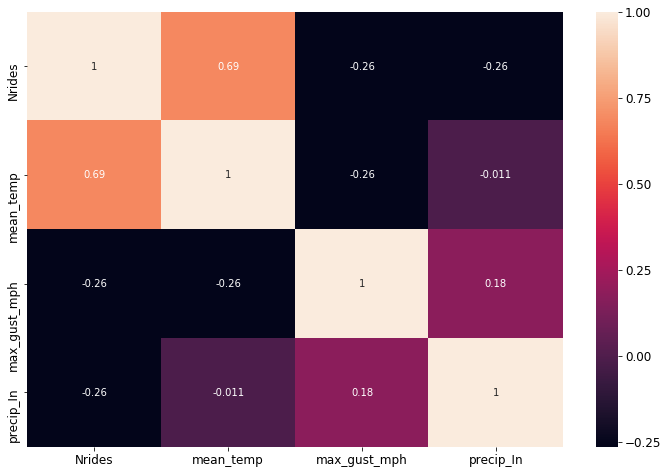

In [34]:
corr = rides_wea_comb[['Nrides','mean_temp','max_gust_mph','precip_In']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True)

#plt.savefig('figures/rides_weather_corrplot.pdf')
plt.savefig('/Users/Andy/andypicke.github.io/images/Citibike/rides_wea_corrplot.png')

/Users/Andy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


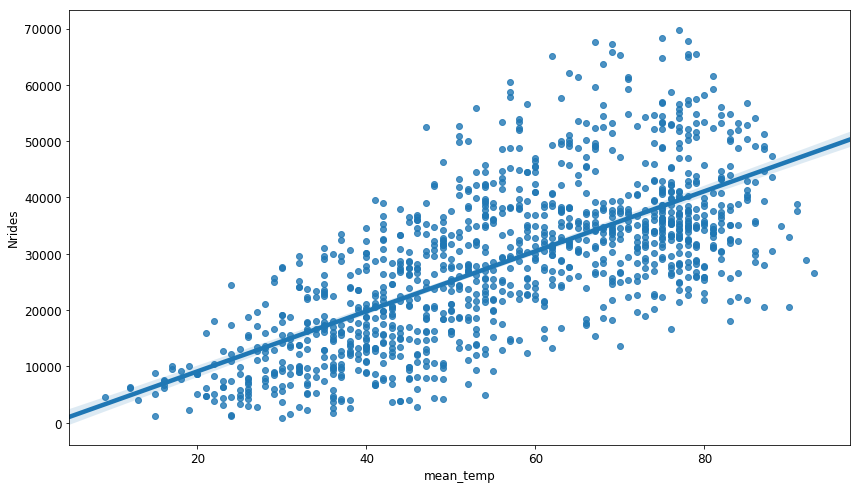

In [36]:
plt.figure(figsize=(14,8))
sns.regplot(rides_wea_comb.mean_temp, rides_wea_comb.Nrides)
plt.savefig('/Users/Andy/andypicke.github.io/images/Citibike/Nrides_Vs_temp.png')

In [24]:
import statsmodels.formula.api as smf
# create a fitted model in one line
lm = smf.ols(formula='Nrides ~mean_temp', data = rides_wea_comb).fit()
# print the coefficients
lm.params

Intercept   -1537.727787
mean_temp     533.128815
dtype: float64

In [28]:
lm = smf.ols(formula='Nrides ~max_gust_mph', data = rides_wea_comb).fit()
# print the coefficients
lm.params

Intercept       41055.462714
max_gust_mph     -459.601027
dtype: float64

/Users/Andy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


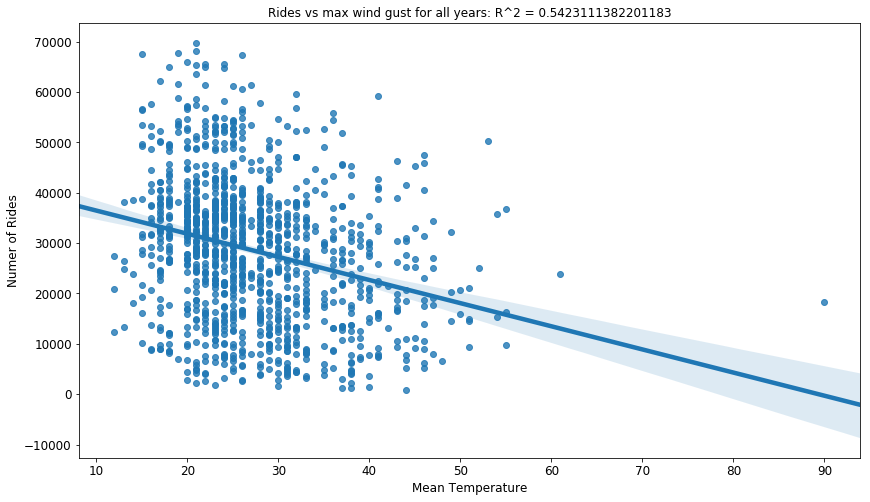

In [37]:
plt.figure(figsize=(14,8))
#plt.scatter(comb.mean_temp, comb.num_rides)
sns.regplot(rides_wea_comb.max_gust_mph, rides_wea_comb.Nrides)
plt.xlabel('Mean Temperature')
plt.ylabel('Numer of Rides')
plt.title('Rides vs max wind gust for all years: R^2 = ' + str(lm.rsquared))
#plt.savefig('figures/rides_vs_wind_all.pdf')

plt.savefig('/Users/Andy/andypicke.github.io/images/Citibike/Nrides_Vs_wind.png')

In [30]:
lm = smf.ols(formula='Nrides ~precip_In', data=rides_wea_comb).fit()
# print the coefficients
lm.params

Intercept    29945.302860
precip_In   -10770.120462
dtype: float64

/Users/Andy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


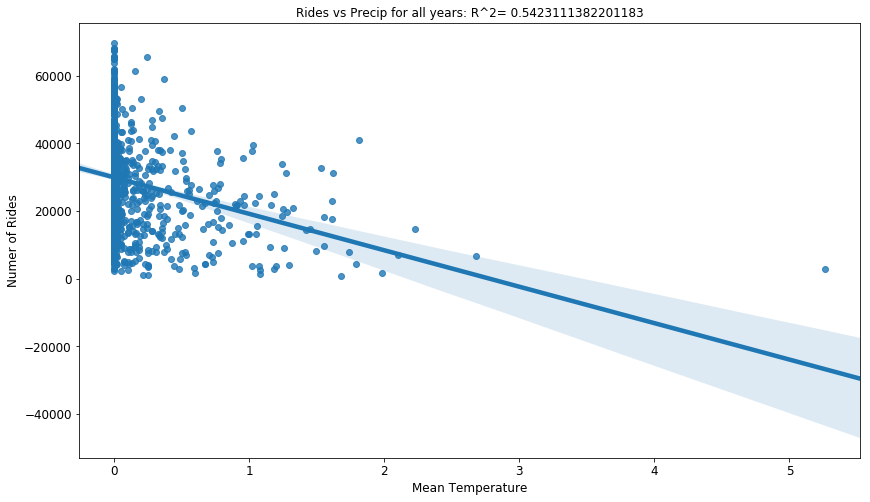

In [38]:
plt.figure(figsize=(14,8))
#plt.scatter(comb.mean_temp, comb.num_rides)
sns.regplot(rides_wea_comb.precip_In, rides_wea_comb.Nrides)
plt.xlabel('Mean Temperature')
plt.ylabel('Numer of Rides')
plt.title('Rides vs Precip for all years: R^2= ' + str(lm.rsquared))

#plt.savefig('figures/rides_vs_precip_all.pdf')
plt.savefig('/Users/Andy/andypicke.github.io/images/Citibike/Nrides_Vs_precip.png')

### Try regression model w/ just temp,precip,wind

In [32]:
lm = smf.ols(formula='Nrides ~ mean_temp + precip_In + max_gust_mph', data = rides_wea_comb).fit()
# print the coefficients
lm.params

Intercept        2423.856393
mean_temp         521.278957
precip_In      -10111.135421
max_gust_mph      -75.365863
dtype: float64

In [33]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Nrides   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     461.7
Date:                Sun, 07 Oct 2018   Prob (F-statistic):          8.07e-198
Time:                        08:45:48   Log-Likelihood:                -12402.
No. Observations:                1173   AIC:                         2.481e+04
Df Residuals:                    1169   BIC:                         2.483e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2423.8564   1509.020      1.606   